In [1]:
import pandas as pd

data = pd.read_csv('weatherAUS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [2]:
# removing nulls from target
data.dropna(axis=0, how='any', subset=['RainTomorrow'], inplace=True)

# selecting feature and target
features = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir3pm', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm']]
target = data['RainTomorrow']

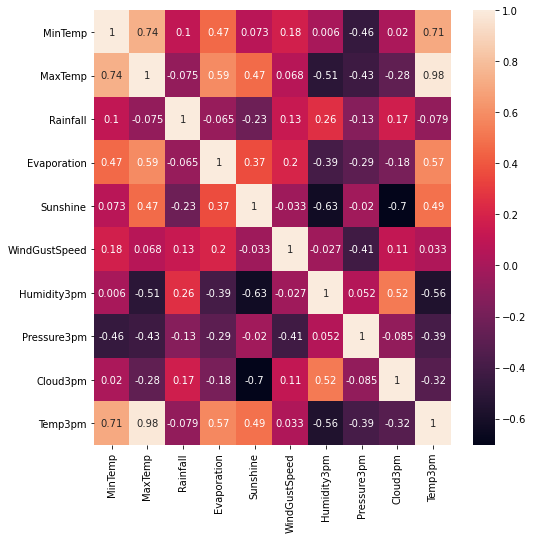

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt

# correalation map
plt.subplots(figsize=(8, 8))
sn.heatmap(features.corr(), annot=True)
plt.show()

In [6]:
# checking null
print(features.isnull().sum())

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Pressure3pm      13981
Cloud3pm         57094
Temp3pm           2726
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# splitting train and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# null handling
for i in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm']:
    x_train[i].fillna(x_train[i].mean(), inplace=True)
    x_test[i].fillna(x_test[i].mean(), inplace=True)

for i in ['WindGustDir', 'WindDir3pm']:
    x_train[i].fillna(x_train[i].mode()[0], inplace=True)
    x_test[i].fillna(x_test[i].mode()[0], inplace=True)

C:\Users\Faisal\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [8]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA

# category to number
x_train[['WindGustDir', 'WindDir3pm']] = OrdinalEncoder().fit_transform(x_train[['WindGustDir', 'WindDir3pm']])
x_test[['WindGustDir', 'WindDir3pm']] = OrdinalEncoder().fit_transform(x_test[['WindGustDir', 'WindDir3pm']])

# scaling
scaled_x_train, scaled_x_test = x_train.copy(), x_test.copy()
scaled_x_train = MinMaxScaler().fit_transform(x_train)
scaled_x_test = MinMaxScaler().fit_transform(x_test)

<ipython-input-8-69c6b73cb3ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['WindGustDir', 'WindDir3pm']] = OrdinalEncoder().fit_transform(x_train[['WindGustDir', 'WindDir3pm']])
C:\Users\Faisal\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-8-69c6b73cb3ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

### Training

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(8, activation='logistic', random_state=1)
mlp.fit(scaled_x_train, y_train)
print(f"Training Accuracy:{mlp.score(scaled_x_train, y_train)*100:.2f}%")

Training Accuracy:83.80%


In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)
print(f"Training Accuracy:{rf.score(x_train, y_train)*100:.2f}%")

Training Accuracy:99.99%


In [12]:
print(f"MLP Accuracy:{mlp.score(scaled_x_test, y_test)*100:.2f}%")
print(f"RF Accuracy:{rf.score(x_test, y_test)*100:.2f}%")

MLP Accuracy:84.18%
RF Accuracy:85.70%
